In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.io
import matplotlib.pyplot as plt
import os
import anndata
import harmonypy as hm
import seaborn as sns
import scrublet as scr
import bbknn as bk
%matplotlib inline
import glob
from statannotations.Annotator import Annotator
from itertools import combinations
from matplotlib import rcParams

/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sc.settings.set_figure_params(dpi=200,fontsize=15)

In [3]:
df = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Resolve/Arterial_quantification/ROI_df/merged_ROIs.csv", index_col = 0)

In [4]:
df

,SULF1+NEBL_percent,SULF1_percent,NEBL_percent,SEMA3G_percent,RGCC_percent,SULF1_mean,NEBL_mean,SEMA3G_mean,RGCC_mean,SULF1_log2_mean,NEBL_log2_mean,SEMA3G_log2_mean,RGCC_log2_mean,SULF1,NEBL,SEMA3G,RGCC,size,ROI
ROI_A1-1_1,0,0.000000,0.300000,0.500000,0.500000,NaN,1.0,2.200000,1.400000,NaN,0.000000,1.137504,0.485427,0,3,11,7,10,A1-1
ROI_A1-1_12,0,0.062500,0.312500,0.812500,0.187500,1.000000,1.2,2.384615,1.000000,0.000000,0.263034,1.253757,0.000000,1,6,31,3,16,A1-1
ROI_A1-1_5,0,0.000000,0.428571,0.714286,0.000000,NaN,1.0,2.000000,NaN,NaN,0.000000,1.000000,NaN,0,3,10,0,7,A1-1
ROI_A1-2_0,0,0.716049,0.000000,0.074074,0.000000,3.034483,NaN,1.000000,NaN,1.601451,NaN,0.000000,NaN,176,0,6,0,81,A1-2
ROI_A1-2_4,0,0.500000,0.000000,0.500000,0.166667,1.333333,NaN,1.000000,1.000000,0.415038,NaN,0.000000,0.000000,4,0,3,1,6,A1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ROI_D2-1_98,0,0.200000,0.000000,0.133333,0.066667,1.714286,1.0,1.500000,2.000000,0.777608,0.000000,0.584963,1.000000,12,2,3,2,15,D2-1
ROI_D2-2_3,0,0.000000,0.000000,0.142857,0.357143,1.000000,1.0,1.000000,1.600000,0.000000,0.000000,0.000000,0.678072,1,1,2,8,14,D2-2
ROI_D2-3_1,0,0.000000,0.000000,0.000000,0.428571,NaN,1.0,NaN,1.000000,NaN,0.000000,NaN,0.000000,0,1,0,3,7,D2-3
ROI_D2-3_24,0,0.000000,0.000000,0.285714,0.000000,1.000000,1.0,1.000000,NaN,0.000000,0.000000,0.000000,NaN,2,3,2,0,7,D2-3


In [11]:
df["SULF1_expression"] = df["SULF1"]/df["SULF1"].max()

In [12]:
df

,SULF1+NEBL_percent,SULF1_percent,NEBL_percent,SEMA3G_percent,RGCC_percent,SULF1_mean,NEBL_mean,SEMA3G_mean,RGCC_mean,SULF1_log2_mean,...,NEBL,SEMA3G,RGCC,size,ROI,SULF1_scaled,NEBL_scaled,SEMA3G_scaled,RGCC_scaled,SULF1_expression
ROI_A1-1_1,0,0.000000,0.300000,0.500000,0.500000,NaN,1.0,2.200000,1.400000,NaN,...,3,11,7,10,A1-1,0.000000,0.3,0.354839,0.116667,0.000000
ROI_A1-1_12,0,0.062500,0.312500,0.812500,0.187500,1.000000,1.2,2.384615,1.000000,0.000000,...,6,31,3,16,A1-1,0.004016,0.6,1.000000,0.050000,0.004016
ROI_A1-1_5,0,0.000000,0.428571,0.714286,0.000000,NaN,1.0,2.000000,NaN,NaN,...,3,10,0,7,A1-1,0.000000,0.3,0.322581,0.000000,0.000000
ROI_A1-2_0,0,0.716049,0.000000,0.074074,0.000000,3.034483,NaN,1.000000,NaN,1.601451,...,0,6,0,81,A1-2,0.706827,0.0,0.193548,0.000000,0.706827
ROI_A1-2_4,0,0.500000,0.000000,0.500000,0.166667,1.333333,NaN,1.000000,1.000000,0.415038,...,0,3,1,6,A1-2,0.016064,0.0,0.096774,0.016667,0.016064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ROI_D2-1_98,0,0.200000,0.000000,0.133333,0.066667,1.714286,1.0,1.500000,2.000000,0.777608,...,2,3,2,15,D2-1,0.048193,0.2,0.096774,0.033333,0.048193
ROI_D2-2_3,0,0.000000,0.000000,0.142857,0.357143,1.000000,1.0,1.000000,1.600000,0.000000,...,1,2,8,14,D2-2,0.004016,0.1,0.064516,0.133333,0.004016
ROI_D2-3_1,0,0.000000,0.000000,0.000000,0.428571,NaN,1.0,NaN,1.000000,NaN,...,1,0,3,7,D2-3,0.000000,0.1,0.000000,0.050000,0.000000
ROI_D2-3_24,0,0.000000,0.000000,0.285714,0.000000,1.000000,1.0,1.000000,NaN,0.000000,...,3,2,0,7,D2-3,0.008032,0.3,0.064516,0.000000,0.008032


In [13]:
df2 = df.melt(id_vars=['size'], value_vars=['SULF1_expression'])
df2

,size,variable,value
0,10,SULF1_expression,0.000000
1,16,SULF1_expression,0.004016
2,7,SULF1_expression,0.000000
3,81,SULF1_expression,0.706827
4,6,SULF1_expression,0.016064
...,...,...,...
91,15,SULF1_expression,0.048193
92,14,SULF1_expression,0.004016
93,7,SULF1_expression,0.000000
94,7,SULF1_expression,0.008032


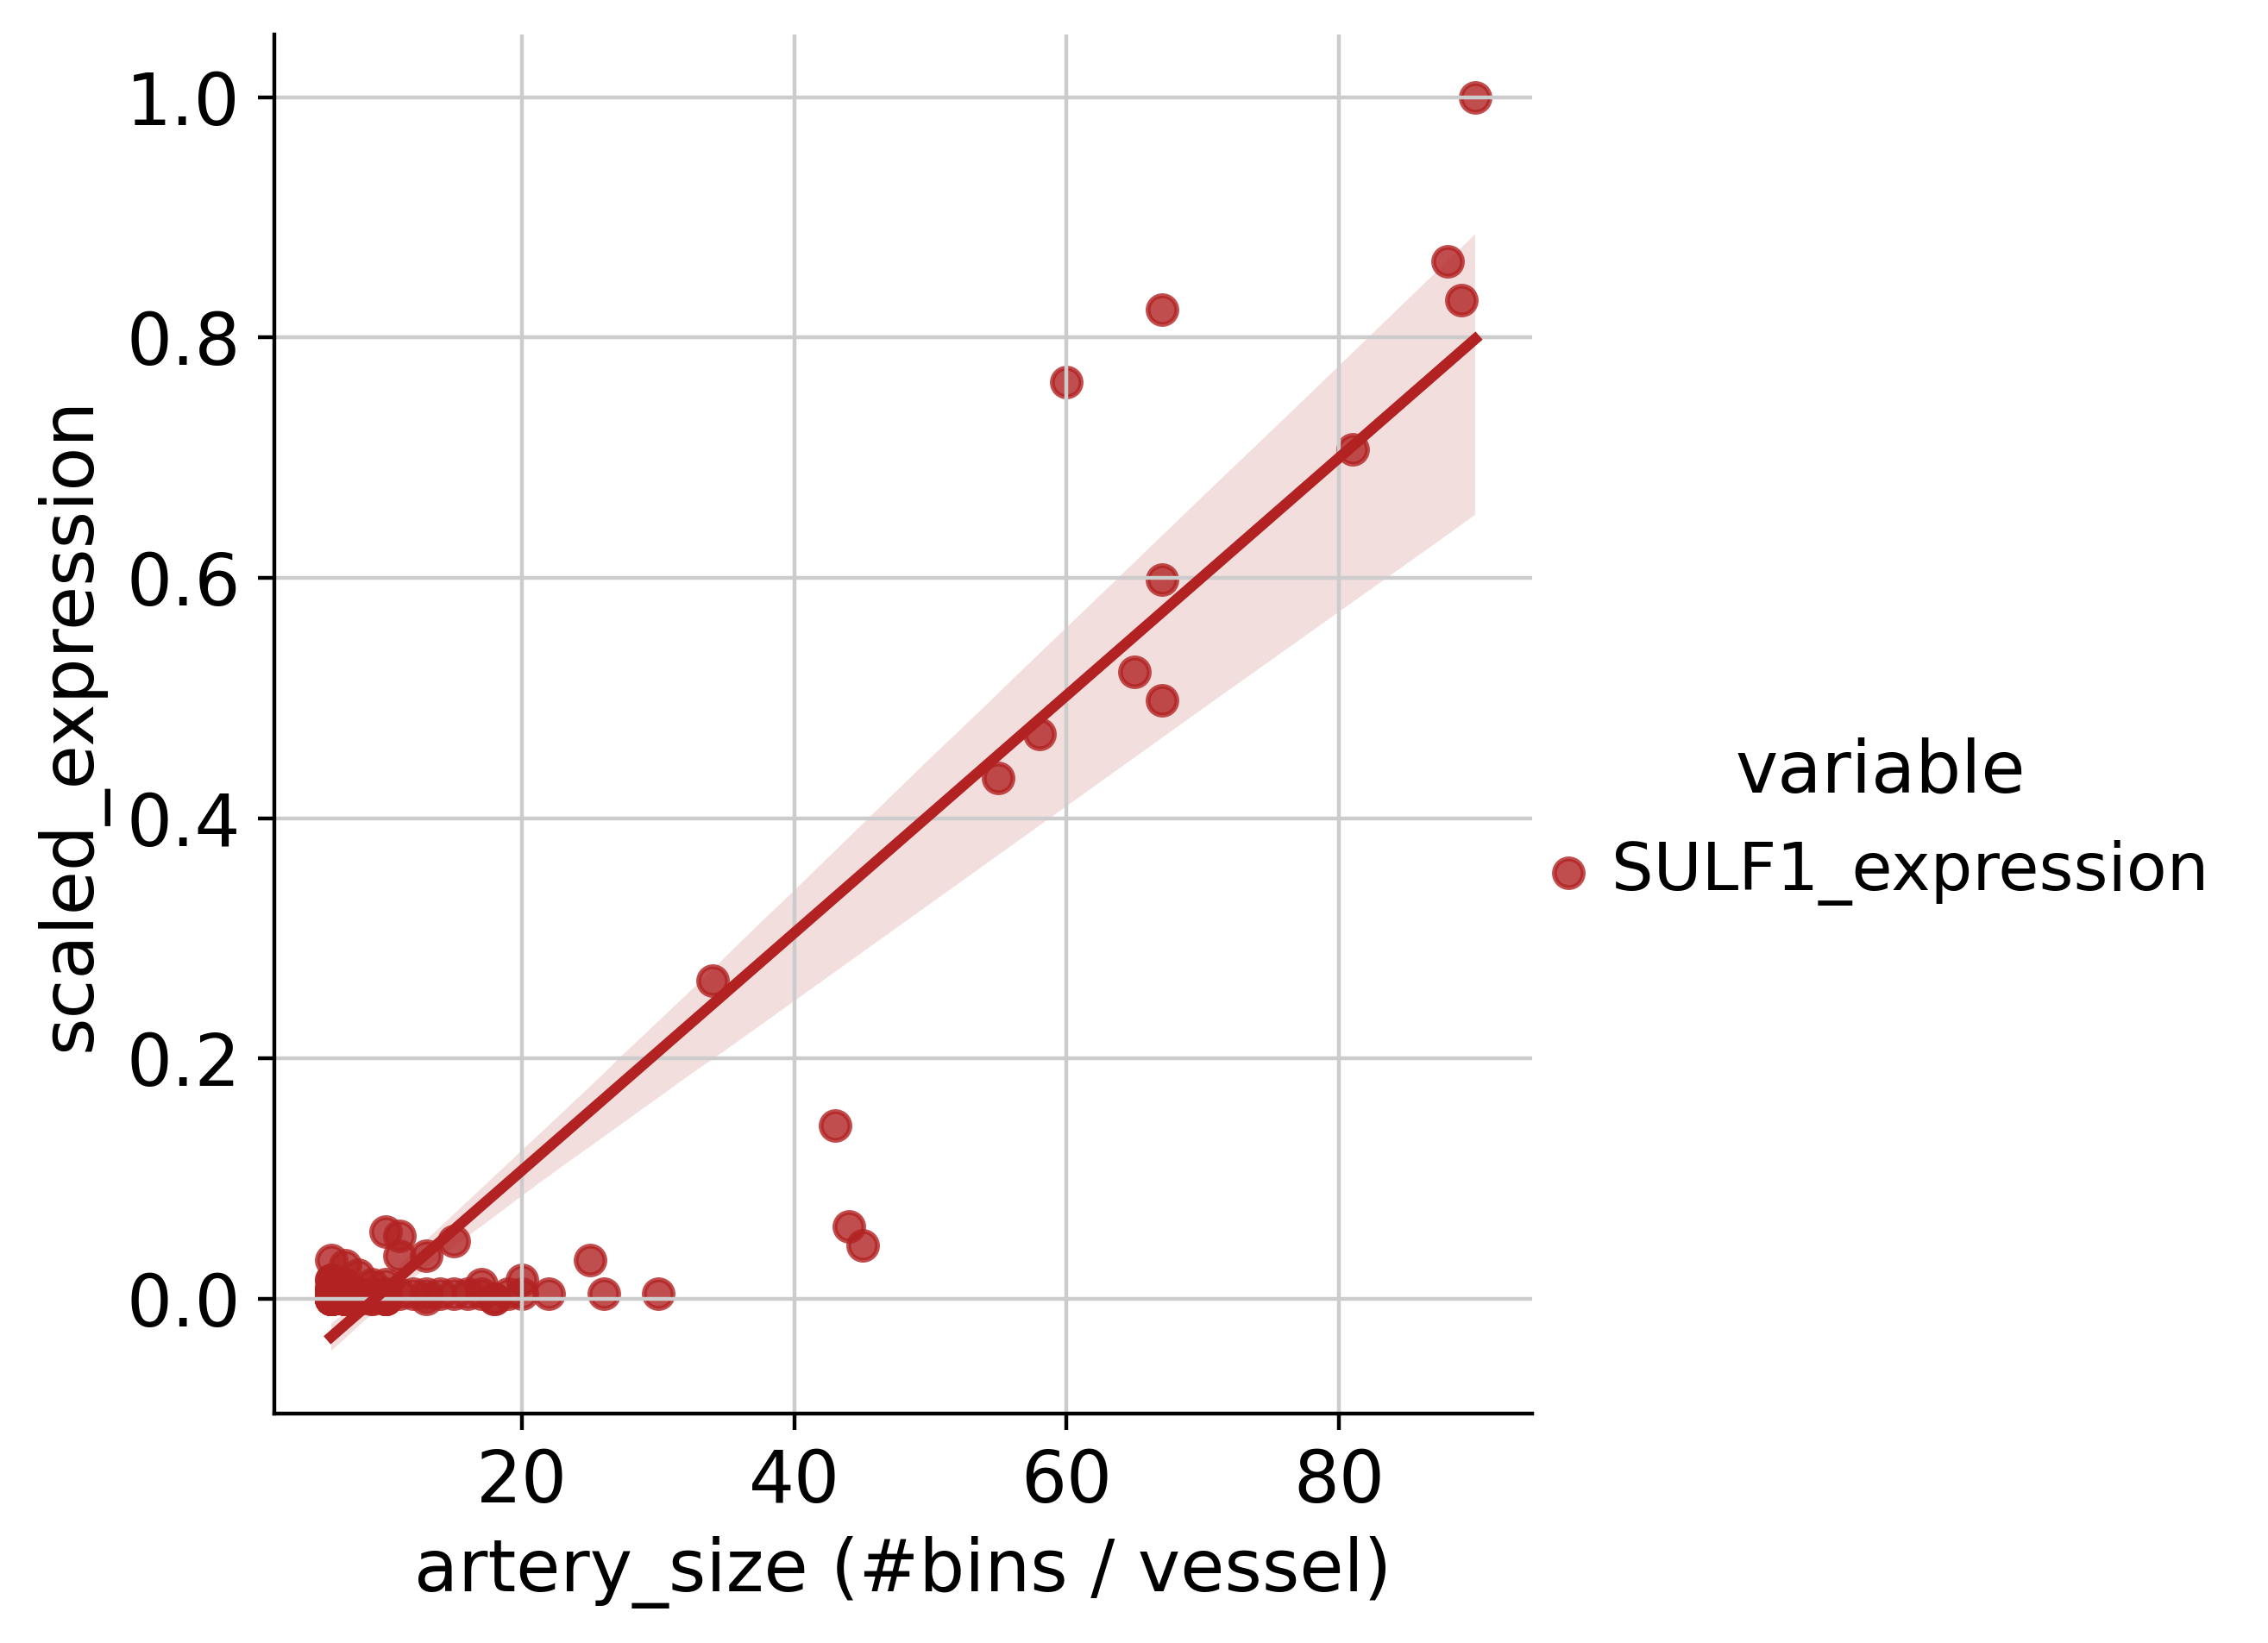

In [14]:
ax = sns.lmplot(data=df2, x="size", y="value", hue = 'variable', palette = ['firebrick'])
ax.set(xlabel= 'artery_size (#bins / vessel)', ylabel='scaled_expression')
plt.show()
